In [1]:
import requests
from bs4 import BeautifulSoup
import os

# CREATING A DATABASE 😎
Scrape data from [IndianExpress News Website](https://indianexpress.com/) for diffrent topic and save it to data base.

### Collect Sports 🤾🏻‍♂️

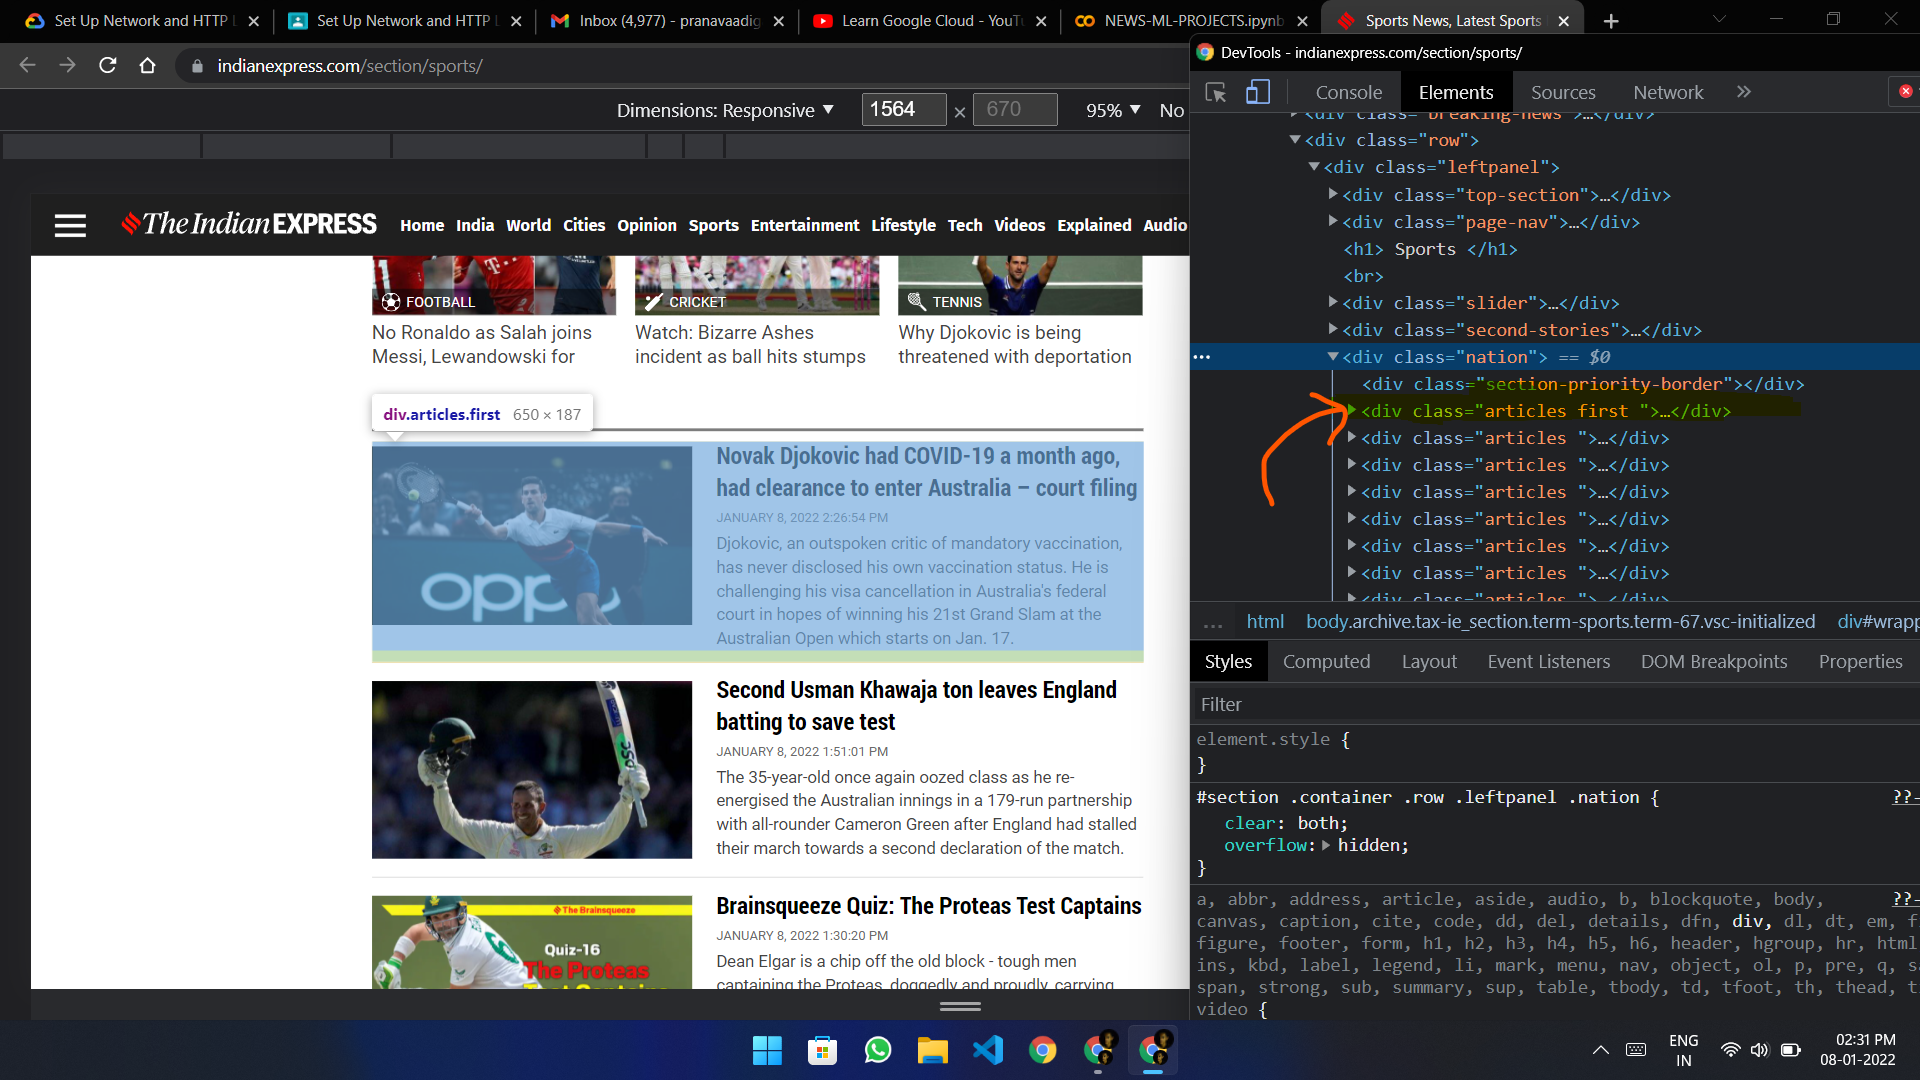

In [ ]:
def collectSportsNews(): 
  URL = "https://indianexpress.com/section/sports/"
  r = requests.get(URL)
  soup = BeautifulSoup(r.content, 'html5lib')
  selected = soup.find('div', attrs = {'class':'nation'}) 
  newss = selected.findAll('div', attrs={'class': 'articles'})
  news_list = []
  for news in newss:
    c.execute("INSERT INTO NEWS(news_article , category ) VALUES (?,?)",(news.find('p').text, "SPORTS"))
  for i in range(2,100):
    r = requests.get(URL+"/page/"+str(i))
    soup = BeautifulSoup(r.content, 'html5lib')
    selected = soup.find('div', attrs = {'class':'nation'}) 
    newss = selected.findAll('div', attrs={'class': 'articles'})
    for news in newss:
      c.execute("INSERT INTO NEWS(news_article , category ) VALUES (?,?)",(news.find('p').text, "SPORTS"))
    connection.commit()
  print(news_list)

### Collect Entertainment Data 🎭

In [ ]:
def collectEntertainmentData(): 
  URL = "https://indianexpress.com/section/entertainment/"
  r = requests.get(URL)
  soup = BeautifulSoup(r.content, 'html5lib')
  selected = soup.find('div', attrs = {'class':'nation'}) 
  newss = selected.findAll('div', attrs={'class': 'articles'})
  news_list = []
  for news in newss:
    c.execute("INSERT INTO NEWS(news_article , category ) VALUES (?,?)",(news.find('p').text, "ENTERTAINMENT"))
  for i in range(2,100):
    r = requests.get(URL+"/page/"+str(i))
    soup = BeautifulSoup(r.content, 'html5lib')
    selected = soup.find('div', attrs = {'class':'nation'}) 
    newss = selected.findAll('div', attrs={'class': 'articles'})
    for news in newss:
      c.execute("INSERT INTO NEWS(news_article , category ) VALUES (?,?)",(news.find('p').text, "ENTERTAINMENT"))
    connection.commit()
  print(news_list)

### Collect Tech Data 🧑🏻‍💻

In [ ]:
def collectTechData(): 
  URL = "https://indianexpress.com/section/technology/"
  r = requests.get(URL)
  soup = BeautifulSoup(r.content, 'html5lib')
  # selected = soup.find('ul', attrs = {'class':'article-list'}) 
  # newss = selected.findAll('li')
  # for news in newss:
  #   c.execute("INSERT INTO NEWS(news_article , category ) VALUES (?,?)",(news.findAll('a')[1].text, "TECH"))
  for i in range(100,106):
    r = requests.get(URL+"/page/"+str(i))
    soup = BeautifulSoup(r.content, 'html5lib')
    selected = soup.find('ul', attrs = {'class':'article-list'}) 
    newss = selected.findAll('li')
    for news in newss:
      c.execute("INSERT INTO NEWS(news_article , category ) VALUES (?,?)",(news.findAll('a')[1].text, "TECH"))
    connection.commit()

### Get Business Data 👨🏻‍💼

In [ ]:
def collectBusinessData(): 
  URL = "https://indianexpress.com/section/business/"
  r = requests.get(URL)
  soup = BeautifulSoup(r.content, 'html5lib')
  selected = soup.find('div', attrs = {'class':'nation'}) 
  newss = selected.findAll('div', attrs={'class': 'articles'})
  news_list = []
  for news in newss:
    c.execute("INSERT INTO NEWS(news_article , category ) VALUES (?,?)",(news.find('p').text, "BUSINESS"))
  for i in range(2,100):
    r = requests.get(URL+"/page/"+str(i))
    soup = BeautifulSoup(r.content, 'html5lib')
    selected = soup.find('div', attrs = {'class':'nation'}) 
    newss = selected.findAll('div', attrs={'class': 'articles'})
    for news in newss:
      c.execute("INSERT INTO NEWS(news_article , category ) VALUES (?,?)",(news.find('p').text, "BUSINESS"))
    connection.commit()
  print(news_list)

### Get Educational Data 📖

In [ ]:
def collectEducationData(): 
  URL = "https://indianexpress.com/section/education/"
  r = requests.get(URL)
  soup = BeautifulSoup(r.content, 'html5lib')
  selected = soup.find('div', attrs = {'class':'nation'}) 
  newss = selected.findAll('div', attrs={'class': 'articles'})
  news_list = []
  for news in newss:
    c.execute("INSERT INTO NEWS(news_article , category ) VALUES (?,?)",(news.find('p').text, "EDUCATION"))
  for i in range(2,100):
    r = requests.get(URL+"/page/"+str(i))
    soup = BeautifulSoup(r.content, 'html5lib')
    selected = soup.find('div', attrs = {'class':'nation'}) 
    newss = selected.findAll('div', attrs={'class': 'articles'})
    for news in newss:
      c.execute("INSERT INTO NEWS(news_article , category ) VALUES (?,?)",(news.find('p').text, "EDUCATION"))
    connection.commit()
  print(news_list)

In [ ]:
def getAllInfoData():
  c.execute("SELECT Category , COUNT(*) FROM NEWS Group by Category")
  print(c.fetchall())

### Creating NEWS Table⏹️

In [2]:
import sqlite3
# if db not exist then ask and scrape 
if not (os.path.isfile("News.db")): 
  print("#"*50)
  choice = input("Can I scrape the data from net? Y-n: ")
  if (choice.lower() == "y" or choice.lower() ==" yes"):
    connection = sqlite3.connect("News.db")
    c = connection.cursor()
    c.execute("""CREATE TABLE NEWS(news_article text, category text)""")
    collectSportsNews()
    collectEntertainmentData()
    collectTechData()
    collectEducationData()
    collectBusinessData()
    getAllInfoData()
  else:
    pass
else:
  connection = sqlite3.connect("News.db")
  c = connection.cursor()

# Asli Game Shuru 🚩

### Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Connect To Database And Create A DataFrame

In [4]:
sql_query = pd.read_sql_query ('''
                               SELECT
                               *
                               FROM NEWS
                               ''', connection)

df = pd.DataFrame(sql_query, columns = ['news_article', 'category'])
# print (df)
# getAllInfoData()

### Exploring The DataSets

In [5]:
df.head()

,news_article,category
0,"Former Bengal captain Laxmi Ratan Shukla, who ...",SPORTS
1,"""Day 40 - Finished. Preet has just made histor...",SPORTS
2,Jan-Lennard Struff withstood 34 aces in a 7-6 ...,SPORTS
3,On a pitch on which Bangladesh and New Zealand...,SPORTS
4,"The matter was, however, resolved after talks ...",SPORTS


In [6]:
df.category.value_counts()

TECH             2500
SPORTS           2475
BUSINESS         2475
EDUCATION        2475
ENTERTAINMENT    2475
Name: category, dtype: int64

In [7]:
max(df["news_article"])

'🔴The top recruiters across the IITs have been American Express, Microsoft, EXL Analytics, Google, Uber, Reliance India Limited, Goldman Sachs, and Rakuten Mobile, among others.'

In [8]:
min(df["news_article"])

"\tThe Delhi University Teachers' Association had written to acting vice-chancellor Professor PC Joshi over the issue.\n"

In [9]:
df.isnull().sum()

news_article    0
category        0
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
lc = LabelEncoder()
df["categoryId"] = lc.fit_transform(df["category"])
df.sample(10)

,news_article,category,categoryId
9836,The entrance exam is scheduled to be held on D...,EDUCATION,1
6546,Google Pixel 6 series rumour roundup: Specific...,TECH,4
10797,JEE Main 2021 Day 3 analysis: The level was mu...,EDUCATION,1
9340,Privatisation plans for key state-owned compan...,BUSINESS,0
10891,"West Bengal WBBSE Madhyamik 10th Result 2021, ...",EDUCATION,1
6308,Apple MacBook Air renders hint at possible new...,TECH,4
5973,Facebook’s work app Workplace to integrate wit...,TECH,4
9300,"“Just as I had said, the decision to lower the...",BUSINESS,0
2625,Do mass movies still have the power to draw pe...,ENTERTAINMENT,2
673,With RoundGlass Punjab FC competing in its sec...,SPORTS,3


In [12]:
categoryDF = df[["category", "categoryId"]].drop_duplicates().sort_values(by="categoryId")
categoryDF

,category,categoryId
6930,BUSINESS,0
9405,EDUCATION,1
2475,ENTERTAINMENT,2
0,SPORTS,3
4950,TECH,4


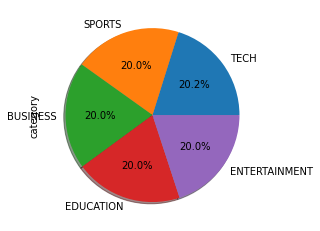

In [13]:
df["category"].value_counts().plot(kind="pie", shadow=True, autopct='%1.1f%%')

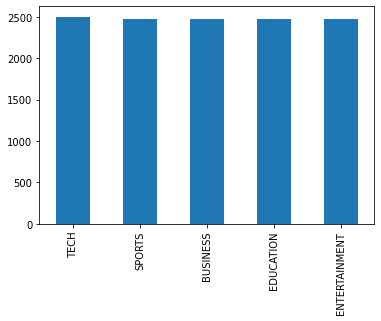

In [14]:
df["category"].value_counts().plot(kind="bar")

In [15]:
sportsDF = df[df["category"]=="SPORTS"]
teachDF = df[df["category"]=="TECH"]
entertainmentDF = df[df["category"]=="ENTERTAINMENT"]
businessDF = df[df["category"]=="BUSINESS"]
educationDF = df[df["category"]=="EDUCATION"]

In [16]:
educationDF.sample(10)

,news_article,category,categoryId
9699,The date sheet has been released for the part-...,EDUCATION,1
10081,The central university was in the news as one ...,EDUCATION,1
10687,Uttar Pradesh UPMSP class 12 results: Students...,EDUCATION,1
11488,"The SDMA, which is headed by Chief Minister Ud...",EDUCATION,1
10496,The 2021 ARWU released by Shanghai Ranking Con...,EDUCATION,1
9420,"NID DAT 2022 was conducted on January 2, 2022....",EDUCATION,1
9879,"Earlier, students had to buy two bare Acts – o...",EDUCATION,1
9986,Schools remained closed from October 9 on the ...,EDUCATION,1
9625,"Apart from the concerns on the exam pattern, s...",EDUCATION,1
11472,Delhi University has written to its colleges t...,EDUCATION,1


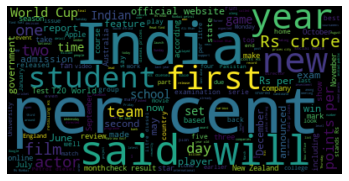

In [17]:
import nltk
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
textt = " ".join(review for review in df["news_article"])
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

In [ ]:
# set(" ".join(review for review in df["news_article"]))

In [18]:
# ''.join(
import re

def filterNonAscii(text):
  for i, news in enumerate(dataSet[colName]):
    dataSet["filtered_"+colName][i] = re.sub('[^a-z ]+', '', news.lower())

In [19]:
filter(df, "news_article")

In [20]:
df

,news_article,category,categoryId
0,"Former Bengal captain Laxmi Ratan Shukla, who ...",SPORTS,3
1,"""Day 40 - Finished. Preet has just made histor...",SPORTS,3
2,Jan-Lennard Struff withstood 34 aces in a 7-6 ...,SPORTS,3
3,On a pitch on which Bangladesh and New Zealand...,SPORTS,3
4,"The matter was, however, resolved after talks ...",SPORTS,3
...,...,...,...
12395,GooFoto Tripod review: Bend it like this one,TECH,4
12396,MSI Optix MEG381CQR Plus gaming monitor launch...,TECH,4
12397,Leica Q2 007 Limited Edition is the camera Bon...,TECH,4
12398,Apple says bike-mounting may damage your iPhon...,TECH,4


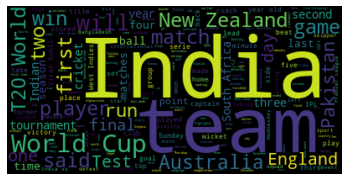

In [21]:
import nltk
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
textt = " ".join(review for review in sportsDF["news_article"])
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

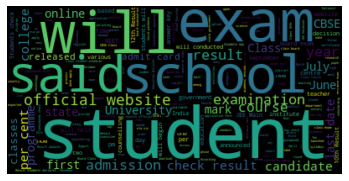

In [22]:
import nltk
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
textt = " ".join(review for review in educationDF["news_article"])
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

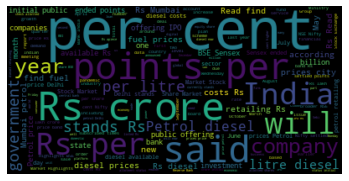

In [23]:
import nltk
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
textt = " ".join(review for review in businessDF["news_article"])
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

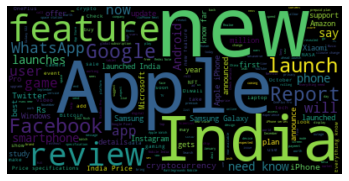

In [24]:
import nltk
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
textt = " ".join(review for review in teachDF["news_article"])
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

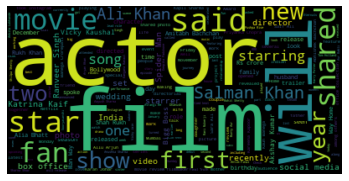

In [25]:
import nltk
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
textt = " ".join(review for review in entertainmentDF["news_article"])
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

In [26]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
def remove_stopwords(text):
  words = word_tokenize(text)
  return [x for x in words if x not in stopwords]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [27]:
df["filtered_news_article"] = df["filtered_news_article"].apply(remove_stopwords)

KeyError: ignored

In [ ]:
df

,news_article,category,categoryId,filtered_news_article
0,"Former Bengal captain Laxmi Ratan Shukla, who ...",SPORTS,3,"[former, bengal, captain, laxmi, ratan, shukla..."
1,"""Day 40 - Finished. Preet has just made histor...",SPORTS,3,"[day, finished, preet, made, history, becoming..."
2,Jan-Lennard Struff withstood 34 aces in a 7-6 ...,SPORTS,3,"[janlennard, struff, withstood, aces, win, joh..."
3,On a pitch on which Bangladesh and New Zealand...,SPORTS,3,"[pitch, bangladesh, new, zealand, collectively..."
4,"The matter was, however, resolved after talks ...",SPORTS,3,"[matter, resolved, talks, players, representat..."
...,...,...,...,...
12395,GooFoto Tripod review: Bend it like this one,TECH,4,"[goofoto, tripod, review, bend, one]"
12396,MSI Optix MEG381CQR Plus gaming monitor launch...,TECH,4,"[msi, optix, megcqr, plus, gaming, monitor, la..."
12397,Leica Q2 007 Limited Edition is the camera Bon...,TECH,4,"[leica, q, limited, edition, camera, bond, fan..."
12398,Apple says bike-mounting may damage your iPhon...,TECH,4,"[apple, says, bikemounting, may, damage, iphon..."
